In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os

# In[50]:
import tensorflow_datasets as tfds


from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,SeparableConv2D
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices("GPU")[0]
tf.config.experimental.set_memory_growth(gpus, True)

In [4]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'train_images' is not defined

<Figure size 432x288 with 0 Axes>

In [155]:
predict_data = train_images[100]

In [3]:

# taring_data 
taring_data_path = "/data/birds/train/*/*"
taring_data_ = pathlib.Path(taring_data_path)
# test data
test_data_path = "/data/birds/test/*/*"
test_data_ = pathlib.Path(test_data_path)
 
#vaildata 
valid_data_path = "/data/birds/valid/*/*"
valid_data_ = pathlib.Path(valid_data_path)


label_name = sorted(item.name for item in test_data_.glob('*/')
                    if item.is_dir())

In [91]:
pre_listc = [ i for i in list(pathlib.Path("/data/birds/valid/").glob("**/*"))]
count = 0 
import os
for i in pre_listc:
    if i.is_dir():
        print(i)
        


/data/birds/valid/98
/data/birds/valid/138
/data/birds/valid/68
/data/birds/valid/24
/data/birds/valid/172
/data/birds/valid/69
/data/birds/valid/23
/data/birds/valid/121
/data/birds/valid/179
/data/birds/valid/67
/data/birds/valid/28
/data/birds/valid/82
/data/birds/valid/32
/data/birds/valid/171
/data/birds/valid/87
/data/birds/valid/162
/data/birds/valid/144
/data/birds/valid/106
/data/birds/valid/94
/data/birds/valid/0
/data/birds/valid/143
/data/birds/valid/14
/data/birds/valid/99
/data/birds/valid/132
/data/birds/valid/42
/data/birds/valid/65
/data/birds/valid/35
/data/birds/valid/29
/data/birds/valid/44
/data/birds/valid/15
/data/birds/valid/103
/data/birds/valid/156
/data/birds/valid/145
/data/birds/valid/80
/data/birds/valid/64
/data/birds/valid/131
/data/birds/valid/72
/data/birds/valid/112
/data/birds/valid/63
/data/birds/valid/152
/data/birds/valid/128
/data/birds/valid/10
/data/birds/valid/71
/data/birds/valid/169
/data/birds/valid/1
/data/birds/valid/108
/data/birds/valid

In [6]:
pre_list = [ str(i) for i in list(pathlib.Path("/data/birds/valid/").glob("*/*"))]
predict_data = list()
for a in pre_list[::100]:
    print(a)
    a = tf.io.read_file(a).numpy()

    d =tf.image.resize( tf.image.decode_jpeg(a), [150, 150])
    d = d.numpy()
    
    d = d.reshape(1,150,150,3).tolist()
    predict_data.append(d)  






#par_ds  = tf.data.Dataset.from_tensor_slices(traing_image_path).map(parse_image).shuffle(buffer_size=2000).batch(batch_size=100).repeat()


In [92]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = parts[-2]
    #print(tf.strings.as_string(label))
    label  == label_name
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [150, 150])
    return image, label

In [93]:
traing_ds = tf.data.Dataset.list_files(str(taring_data_)).map(parse_image).shuffle(buffer_size=2000).batch(batch_size=100).repeat()

validation_ds = tf.data.Dataset.list_files(str(valid_data_)).map(parse_image).shuffle(buffer_size=2000).batch(batch_size=100).repeat()
test_ds =  tf.data.Dataset.list_files(str(test_data_)).map(parse_image).shuffle(buffer_size=2000).batch(batch_size=100).repeat()

# for i in traing_ds.take(100):
#     c = i[0]
#     print(i[1])
#     plt.figure()
#     plt.imshow(c)
#     plt.colorbar()
#     #plt.grid(False)
#     plt.show()


In [75]:
for i in traing_ds.take(1):
#     d = i[0][0].numpy()
    
#     #d = d.reshape(32,32,3).tolist()
#     #d
#     plt.figure()
#     plt.imshow(d)
#     #plt.grid(False)
#     plt.show()
#     #data = i[1]
    a = i[1][0]
    
    print(type(a.numpy().decode()))
    

<class 'str'>


In [94]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(SeparableConv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(SeparableConv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [95]:
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 72, 72, 64)        2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 34, 34, 128)       8896      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

In [ ]:
history =model.fit(traing_ds,epochs=10, 
                   steps_per_epoch=1000,
                   validation_data=validation_ds, 
                   validation_steps=5)


Train for 1000 steps, validate for 5 steps
Epoch 1/10


In [47]:
model.evaluate(test_ds, steps=100)

100/100 [==============================] - 9s 88ms/step - loss: 0.0864 - accuracy: 0.9946


[0.08637970566749573, 0.9945946]

In [6]:
clothing_model = models.Sequential([
   Flatten(input_shape=(28, 28)),
   Dense(128, activation='relu'),
   Dense(10)
])
clothing_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cloese_model.summary()

NameError: name 'cloese_model' is not defined

In [163]:
clothing_model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 3.0332 - accuracy: 0.6874
Epoch 2/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.7095 - accuracy: 0.7333
Epoch 3/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.6228 - accuracy: 0.7658
Epoch 4/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5515 - accuracy: 0.8070
Epoch 5/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5081 - accuracy: 0.8236
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.5090 - accuracy: 0.8251
Epoch 7/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4840 - accuracy: 0.8321
Epoch 8/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4808 - accuracy: 0.8353
Epoch 9/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4845 - accuracy: 0.8337
Epoch

In [164]:
clothing_model.evaluate(test_images, test_labels, steps=1000)

10000/10000 [==============================] - 3s 294us/sample - loss: 0.5523 - accuracy: 0.8289


[0.5522925056931562, 0.8289]

In [165]:

predict_data = predict_data.reshape(1,28,28)
print(predict_data.shape)
data_pre = cloese_model.predict(predict_data)
pre_num = np.argmax(data_pre)
print(pre_num)
class_names[pre_num]

(1, 28, 28)
3


'Dress'

In [168]:
new_model = models.Sequential([
   
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(100, 100 ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
new_model.summary()
new_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 128)     

In [9]:
history =new_model.fit(traing_ds,epochs=10, steps_per_epoch=1000,validation_data=validation_ds, validation_steps=5)


NameError: name 'new_model' is not defined

In [170]:
models.evaluate(validation_ds, steps=100)


100/100 [==============================] - 7s 66ms/step - loss: 2.4437 - accuracy: 0.7240


[2.4437484443187714, 0.724]

       loss  accuracy  val_loss  val_accuracy
0  0.059901  0.996117   0.12340         0.992
1  0.059918  0.996116   0.12340         0.992
2  0.059918  0.996116   0.12340         0.992
3  0.059918  0.996116   0.09255         0.994
4  0.059918  0.996116   0.12340         0.992
5  0.059764  0.996126   0.09255         0.994
6  0.060073  0.996105   0.12340         0.992
7  0.059609  0.996136   0.12340         0.992
8  0.060227  0.996095   0.12340         0.992
9  0.059918  0.996116   0.06170         0.996


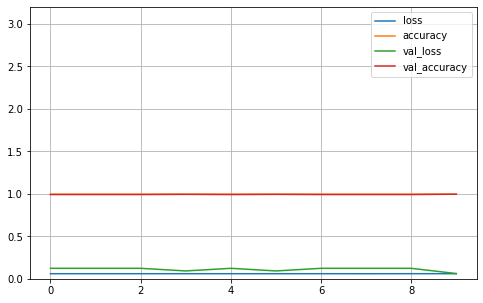

In [35]:
import matplotlib.pyplot as plt

def plot_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    print(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0,3.2)
    plt.show()
plot_curves(history)

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(10)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()
# acc = new_model.history.history['accuracy']
# val_acc = new_model.history.history['val_accuracy']

# loss = new_model.history.history['loss']
# val_loss = new_model.history.history['val_loss']

# epochs_range = range(10)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [50]:
# pre_data = model.predict(pre_dict[0])
#np.argmax(pre_data)
#print(pre_dict[1])
#plt.imshow(pre_dict[1])
for i in pre_dict:
    pre_data = model.predict(pre_dict[0])
    print(pre_data)
    print(np.argmax(pre_data))

[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  -1.2996111 ]]
2
[[-0.70370555 -0.5365582  -0.20356709 -1.6748595  -0.56169474 -0.4296621
  -0.64041096 -0.5956899  -1.1157427  